In [ ]:
#=
using Logging
Logging.configure(filename="logfile.log")
Logging.configure(level=INFO)
=#

In [1]:
using Turing, StatsPlots

┌ Info: Recompiling stale cache file /Users/malcolm/.julia/compiled/v1.0/StatsPlots/SiylL.ji for StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1190


In [2]:
const Chp10=homedir()*"/PacktPub/Chp10"
cd(Chp10)

In [3]:
# Define a simple Normal model with unknown mean and variance.
@model gdemo(x, y) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x ~ Normal(m, sqrt(s))
  y ~ Normal(m, sqrt(s))
end

gdemo (generic function with 3 methods)

In [4]:
#  Run sampler, collect results
chn = sample(gdemo(1.5, 2), HMC(1000, 0.1, 5))

[HMC] Sampling...  0%  ETA: 1:12:09
  ϵ:         0.1
  α:         0.9890454469460024
4m  pre_cond:  [1.0]


[HMC] Sampling...100% Time: 0:00:05

[HMC] Finished with
  Running time        = 4.952477130999995;
  Accept rate         = 0.998;
  #lf / sample        = 4.995;
  #evals / sample     = 6.995;
  pre-cond. metric    = [1.0].


Object of type Chains, with data of type 1000×8×1 Array{Union{Missing, Float64},3}

Log evidence      = 0.0
Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
internals         = elapsed, epsilon, eval_num, lf_eps, lf_num, lp
parameters        = m, s

parameters
   Mean    SD   Naive SE  MCSE    ESS  
m 1.3003 0.8873   0.0281 0.0992 79.9832
s 2.2036 2.0416   0.0646 0.2368 74.3417



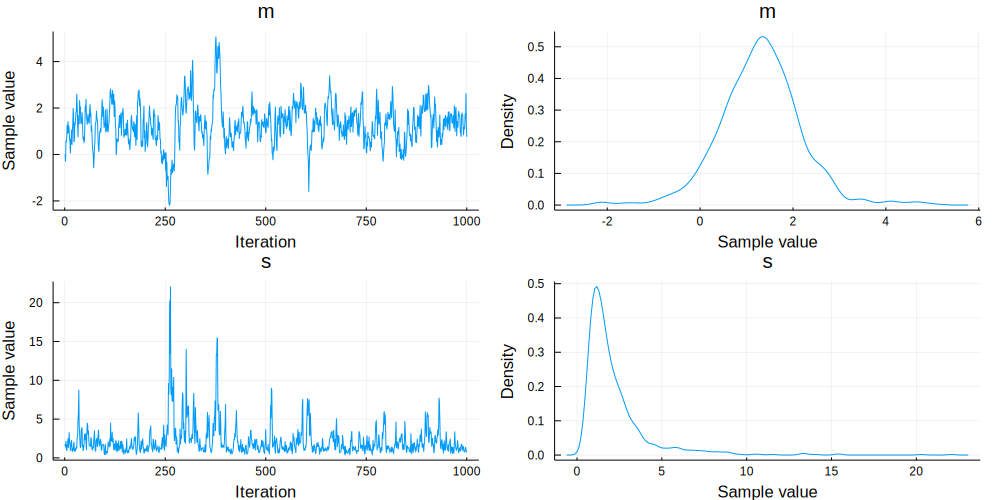

In [5]:
# Plot and save results
p = plot(chn)

In [6]:
savefig("gdemo-plot.png")

---

In [7]:
using LogDensityProblems, DynamicHMC, Turing

ArgumentError: ArgumentError: Package LogDensityProblems not found in current path:
- Run `import Pkg; Pkg.add("LogDensityProblems")` to install the LogDensityProblems package.


In [8]:
# Model definition.
@model gdemo2(x, y) = begin
  s ~ InverseGamma(2,3)
  m ~ Normal(0,sqrt(s))
  x ~ Normal(m, sqrt(s))
  y ~ Normal(m, sqrt(s))
end

gdemo2 (generic function with 3 methods)

In [9]:
chn = sample(gdemo2(1.5, 2.0), DynamicNUTS(2000))

UndefVarError: UndefVarError: DynamicNUTS not defined

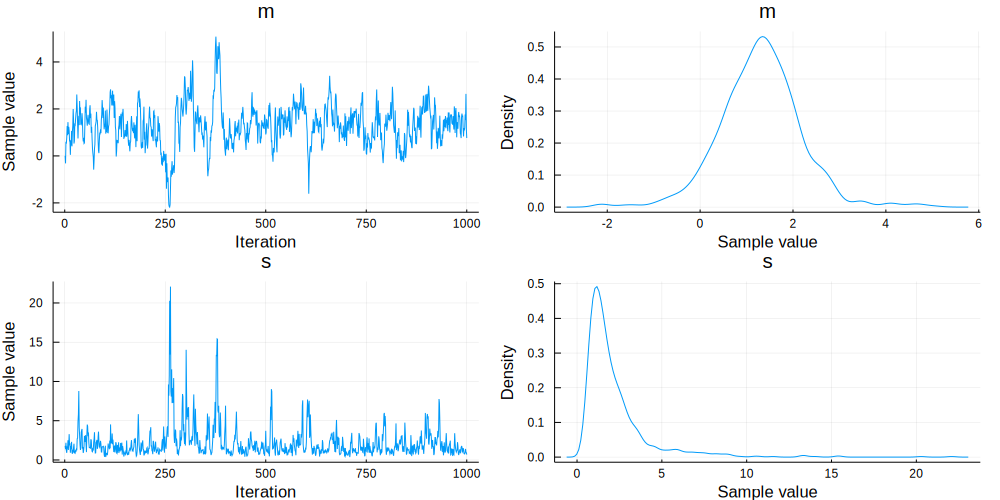

In [10]:
p = plot(chn)

In [11]:
savefig("gdemo2-plot.png")